<a href="https://colab.research.google.com/github/TAKE-JP-17/Pytorch/blob/main/LSTM_Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [196]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [197]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

In [198]:
df = pd.read_csv(csv_path)
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [199]:
# 簡化過多或不必要的數據資料，從第5筆數據開始每六個數據列出來
df = df[5::6]
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420521,31.12.2016 19:10:00,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
420527,31.12.2016 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
420533,31.12.2016 21:10:00,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7
420539,31.12.2016 22:10:00,1000.65,-2.89,270.22,-7.15,72.30,4.93,3.57,1.37,2.22,3.57,1288.03,0.35,0.68,216.7


In [200]:
df.index = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')
df[:26] # The first day up until 26 hours

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
2009-01-01 06:00:00,01.01.2009 06:00:00,997.71,-9.67,263.66,-10.62,92.7,2.93,2.71,0.21,1.69,2.72,1317.71,0.05,0.50,146.0
2009-01-01 07:00:00,01.01.2009 07:00:00,998.33,-9.17,264.12,-10.10,92.9,3.04,2.83,0.22,1.76,2.83,1315.98,2.08,2.88,348.8
2009-01-01 08:00:00,01.01.2009 08:00:00,999.17,-8.10,265.12,-9.05,92.8,3.31,3.07,0.24,1.92,3.08,1311.65,0.72,1.25,213.9
2009-01-01 09:00:00,01.01.2009 09:00:00,999.69,-7.66,265.52,-8.84,91.2,3.43,3.13,0.30,1.95,3.13,1310.14,0.34,0.63,202.2


<Axes: xlabel='Date Time'>

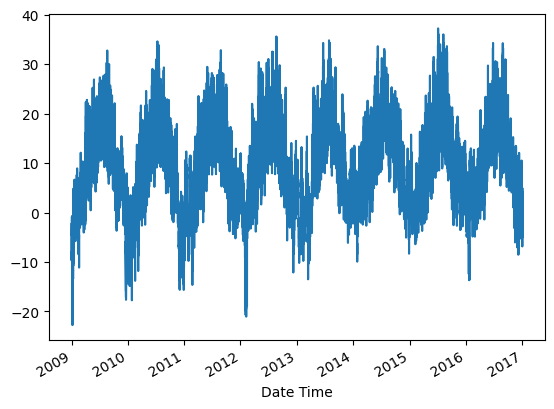

In [201]:
temp = df['T (degC)']
temp.plot()

In [219]:
# [[[1], [2], [3], [4], [5]]] [6]
# [[[2], [3], [4], [5], [6]]] [7]
# [[[3], [4], [5], [6], [7]]] [8]

def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [220]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X1.shape, y1.shape # 這行程式碼會顯示 X1 和 y1 的形狀 (shape)，即它們的維度大小。X1.shape表示共有 70086 個滑動窗口，每個窗口取前5個時間步的數據。y1.shape表示對應的 70086 個標籤。

((70086, 5, 1), (70086,))

In [221]:
X_train1, y_train1 = X1[:60000], y1[:60000] # 前 60,000 筆數據切分出來作為訓練集。
X_val1, y_val1 = X1[60000:65000], y1[60000:65000]
X_test1, y_test1 = X1[65000:], y1[65000:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((60000, 5, 1), (60000,), (5000, 5, 1), (5000,), (5086, 5, 1), (5086,))

In [223]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential() # Use the sequential Api
model1.add(InputLayer((5, 1))) # 每個輸入樣本有5個時間步，每個時間步有1個特徵。(Last 5hr, 1 variable)
model1.add(LSTM(64)) # 64個單元
model1.add(Dense(8, 'relu')) # 8個神經元 & ReLU（整流線性單元）作為激活函數。ReLU將輸入中所有的負值變為0，正值保持不變。
model1.add(Dense(1, 'linear')) # 這行代碼添加了一個輸出層，包含1個神經元，並使用線性激活函數（即沒有激活函數，輸出等於輸入）。這通常用於回歸問題，模型輸出一個實數值。

model1.summary() # 這行代碼打印出模型的結構摘要，包括每一層的名稱、輸出形狀和參數數量。這有助於理解模型的結構和規模。

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_15 (LSTM)                       │ (None, 64)                  │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 8)                   │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,425 (68.07 KB)

 Trainable params: 17,425 (68.07 KB)

 Non-trainable params: 0 (0.00 B)

In [240]:
# ModelCheckpoint:一個回調函數，用來在訓練過程中自動保存模型。model1/:指定了模型權重的保存路徑。save_best_only=True:只有當模型在驗證數據上的性能超過之前的最佳表現時，才會保存模型。這樣可以避免保存過多不必要的模型文件，並確保最終保留的模型是性能最好的。
cp1 = ModelCheckpoint('model1/.keras', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [241]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp1])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.6419 - root_mean_squared_error: 0.8011 - val_loss: 0.5007 - val_root_mean_squared_error: 0.7076
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.6432 - root_mean_squared_error: 0.8020 - val_loss: 0.5006 - val_root_mean_squared_error: 0.7075
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.6394 - root_mean_squared_error: 0.7996 - val_loss: 0.4830 - val_root_mean_squared_error: 0.6950
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.6366 - root_mean_squared_error: 0.7978 - val_loss: 0.4827 - val_root_mean_squared_error: 0.6947
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.6420 - root_mean_squared_error: 0.8010 - val_loss: 0.5306 - val_root_mean_squared_error: 0.7284
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.6384 - root_mean_squared_error: 0.7990 - val_loss: 0.4986 - val_root_mean_squared_error: 0.7061
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━

In [242]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/.keras') # It brings the model into memory model

In [243]:
train_predictions = model1.predict(X_train1).flatten() # flatten():get rid of inner brackets 將多維數組壓平成一維數組。
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


,Train Predictions,Actuals
0,-9.690034,-9.67
1,-9.509400,-9.17
2,-8.525181,-8.10
3,-6.910020,-7.66
4,-6.829911,-7.04
...,...,...
59995,6.127860,6.07
59996,7.030562,9.88
59997,12.213491,13.53
59998,15.558890,15.43


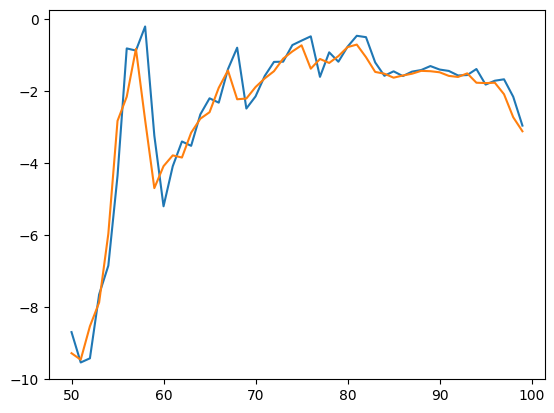

In [244]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])

In [145]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


,Val Predictions,Actuals
0,15.435545,14.02
1,13.224787,13.67
2,13.041054,12.27
3,11.463637,11.19
4,10.389795,10.85
...,...,...
4995,17.339169,18.27
4996,17.308502,17.85
4997,17.219303,16.65
4998,15.847379,15.85


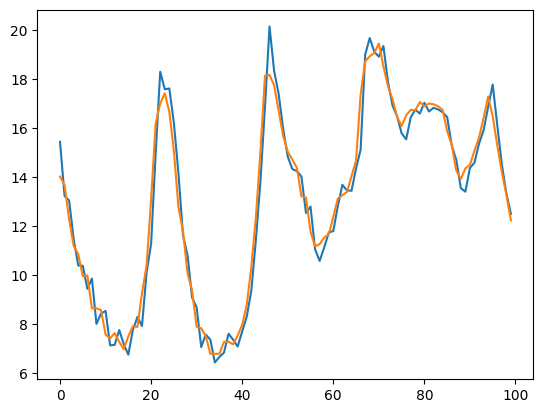

In [245]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

In [246]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results

159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


,Test Predictions,Actuals
0,14.303327,13.99
1,13.128976,13.46
2,12.912891,12.93
3,12.433554,12.43
4,11.998822,12.17
...,...,...
5081,-0.906707,-0.98
5082,-1.385929,-1.40
5083,-1.553006,-2.75
5084,-3.139159,-2.89


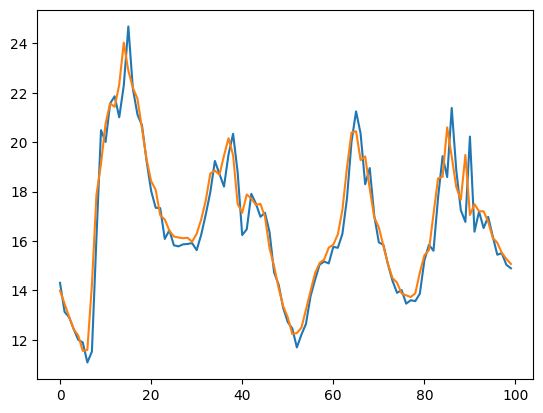

In [247]:
plt.plot(test_results['Test Predictions'][:100])
plt.plot(test_results['Actuals'][:100])

In [248]:
# Split

In [150]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(model, X, y, start=0, end=500):
  predictions = model.predict(X).flatten() # flatten():將多維數組壓平成一維。例如:[[1], [2], [3]] 使用 .flatten() 後會變成 [1, 2, 3]。
  df = pd.DataFrame(data={'Predictions': predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(predictions, y)

159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


(      Predictions  Actuals
 0       14.380031    13.99
 1       13.220485    13.46
 2       12.853750    12.93
 3       12.449625    12.43
 4       12.015779    12.17
 ...           ...      ...
 5081    -0.916147    -0.98
 5082    -1.225308    -1.40
 5083    -1.583314    -2.75
 5084    -3.277743    -2.89
 5085    -3.132658    -3.93
 
 [5086 rows x 2 columns],
 0.6254595633616149)

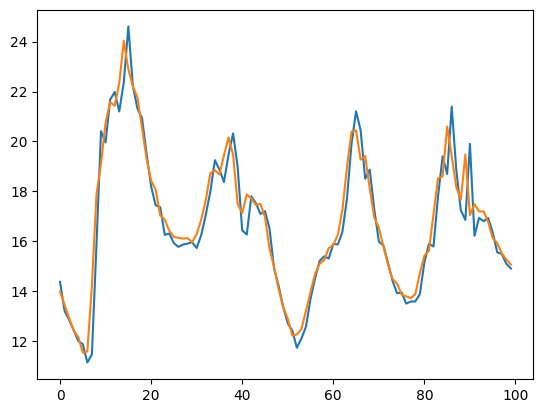

In [151]:
plot_predictions1(model1, X_test1, y_test1)

In [250]:
model2 = Sequential()
model2.add(InputLayer((5, 1)))
model2.add(Conv1D(64, kernel_size=2, activation='relu')) # 64：這是該卷積層的過濾器（filters）數量，表示將會學習 64 個不同的卷積核（或過濾器）。每個卷積核會生成一個特徵圖（feature map），因此這一層的輸出將有 64 個通道。每個過濾器的大小為 2(這是卷積核的大小，也稱為感受野或窗口大小)，每個卷積操作會覆蓋相鄰的 2 個數據點。卷積操作會在數據上滑動，提取局部特徵。
model2.add(Flatten())
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))
model2.summary()

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_6 (Conv1D)                    │ (None, 4, 64)               │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 8)                   │           2,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,257 (8.82 KB)

 Trainable params: 2,257 (8.82 KB)

 Non-trainable params: 0 (0.00 B)

In [252]:
cp2 = ModelCheckpoint('model2/.keras', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [253]:
# model2.fit(...)：訓練模型。
# X_train1：訓練數據, y_train1 是訓練集的標籤或目標變量。
# X_val1 是驗證集的輸入數據，y_val1 是驗證集的標籤。
# 利用回調函數 cp2 來監控或保存模型。
model2.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp2])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 5.1850 - root_mean_squared_error: 2.0133 - val_loss: 0.5340 - val_root_mean_squared_error: 0.7308
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.7153 - root_mean_squared_error: 0.8457 - val_loss: 0.4814 - val_root_mean_squared_error: 0.6938
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.6790 - root_mean_squared_error: 0.8238 - val_loss: 0.4953 - val_root_mean_squared_error: 0.7038
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.6840 - root_mean_squared_error: 0.8270 - val_loss: 0.5137 - val_root_mean_squared_error: 0.7167
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.6666 - root_mean_squared_error: 0.8164 - val_loss: 0.5432 - val_root_mean_squared_error: 0.7370
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.6595 - root_mean_squared_error: 0.8120 - val_loss: 0.4815 - val_root_mean_squared_error: 0.6939
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━

159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


(      Predictions  Actuals
 0       14.433468    13.99
 1       13.221006    13.46
 2       12.953663    12.93
 3       12.550280    12.43
 4       12.126486    12.17
 ...           ...      ...
 5081    -1.129277    -0.98
 5082    -1.526475    -1.40
 5083    -1.743063    -2.75
 5084    -3.173340    -2.89
 5085    -3.067003    -3.93
 
 [5086 rows x 2 columns],
 0.6043168161386403)

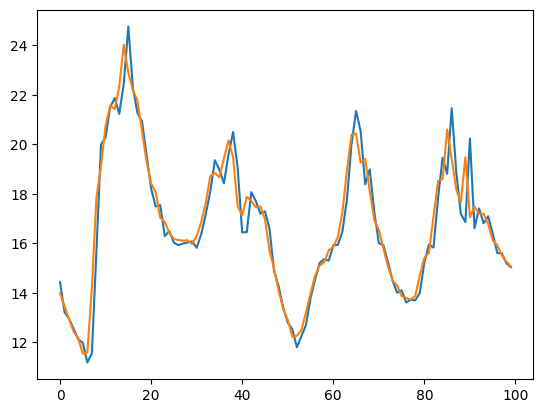

In [254]:
plot_predictions1(model2, X_test1, y_test1)

In [255]:
model3 = Sequential()
model3.add(InputLayer((5, 1)))
model3.add(GRU(64))
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear'))
model3.summary()

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_3 (GRU)                          │ (None, 64)                  │          12,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 8)                   │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,393 (52.32 KB)

 Trainable params: 13,393 (52.32 KB)

 Non-trainable params: 0 (0.00 B)

In [257]:
cp3 = ModelCheckpoint('model3/.keras', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [258]:
model3.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp3])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 12.1897 - root_mean_squared_error: 3.0744 - val_loss: 0.5142 - val_root_mean_squared_error: 0.7171
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.6673 - root_mean_squared_error: 0.8169 - val_loss: 0.5354 - val_root_mean_squared_error: 0.7317
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.6849 - root_mean_squared_error: 0.8275 - val_loss: 0.5113 - val_root_mean_squared_error: 0.7151
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.6489 - root_mean_squared_error: 0.8055 - val_loss: 0.4855 - val_root_mean_squared_error: 0.6968
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.6698 - root_mean_squared_error: 0.8183 - val_loss: 0.4997 - val_root_mean_squared_error: 0.7069
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.6487 - root_mean_squared_error: 0.8053 - val_loss: 0.5129 - val_root_mean_squared_error: 0.7162
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━

In [259]:
temp

,T (degC)
Date Time,
2009-01-01 01:00:00,-8.05
2009-01-01 02:00:00,-8.88
2009-01-01 03:00:00,-8.81
2009-01-01 04:00:00,-9.05
2009-01-01 05:00:00,-9.63
...,...
2016-12-31 19:10:00,-0.98
2016-12-31 20:10:00,-1.40
2016-12-31 21:10:00,-2.75


In [260]:
temp_df = pd.DataFrame({'Temperature':temp})
temp_df['Seconds'] = temp_df.index.map(pd.Timestamp.timestamp)
temp_df

,Temperature,Seconds
Date Time,,
2009-01-01 01:00:00,-8.05,1.230772e+09
2009-01-01 02:00:00,-8.88,1.230775e+09
2009-01-01 03:00:00,-8.81,1.230779e+09
2009-01-01 04:00:00,-9.05,1.230782e+09
2009-01-01 05:00:00,-9.63,1.230786e+09
...,...,...
2016-12-31 19:10:00,-0.98,1.483211e+09
2016-12-31 20:10:00,-1.40,1.483215e+09
2016-12-31 21:10:00,-2.75,1.483219e+09


In [261]:
day = 24*60*60
year = (365.2425)*day

temp_df['Day sin'] = np.sin(temp_df['Seconds'] * (2 * np.pi / day))
temp_df['Day cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / day))
temp_df['Year sin'] = np.sin(temp_df['Seconds'] * (2 * np.pi / year))
temp_df['Year cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / year))
temp_df

,Temperature,Seconds,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 01:00:00,-8.05,1.230772e+09,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,-8.88,1.230775e+09,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,-8.81,1.230779e+09,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,-9.05,1.230782e+09,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,-9.63,1.230786e+09,0.965926,0.258819,0.012916,0.999917
...,...,...,...,...,...,...
2016-12-31 19:10:00,-0.98,1.483211e+09,-0.953717,0.300706,0.006900,0.999976
2016-12-31 20:10:00,-1.40,1.483215e+09,-0.843391,0.537300,0.007617,0.999971
2016-12-31 21:10:00,-2.75,1.483219e+09,-0.675590,0.737277,0.008334,0.999965


In [262]:
temp_df = temp_df.drop('Seconds', axis=1)
temp_df

,Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,
2009-01-01 01:00:00,-8.05,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,-8.88,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,-8.81,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,-9.05,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,-9.63,0.965926,0.258819,0.012916,0.999917
...,...,...,...,...,...
2016-12-31 19:10:00,-0.98,-0.953717,0.300706,0.006900,0.999976
2016-12-31 20:10:00,-1.40,-0.843391,0.537300,0.007617,0.999971
2016-12-31 21:10:00,-2.75,-0.675590,0.737277,0.008334,0.999965


In [266]:
def df_to_X_y2(df, window_size=8):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size): # 這個循環遍歷數據，每次從數組中選擇一個窗口（大小為 window_size）來構建特徵。
    row = [r for r in df_as_np[i:i+window_size]] # 返回從索引 i 開始，長度為 window_size 的一段數據。
    X.append(row)
    label = df_as_np[i+window_size][0] # 這一行從窗口結束的下一個位置選取標籤（即第 window_size 後的第一個數據點）。df_as_np[i+window_size][0] 取該位置的第 0 個特徵值作為標籤（通常是目標變量）。
    y.append(label)
  return np.array(X), np.array(y)

In [267]:
X2, y2 = df_to_X_y2(temp_df) # (number of training examples, number of window sizes, number of features)
X2.shape, y2.shape

((70083, 8, 5), (70083,))

In [268]:
X2_train, y2_train = X2[:60000], y2[:60000]
X2_val, y2_val = X2[60000:65000], y2[60000:65000]
X2_test, y2_test = X2[65000:], y2[65000:]
X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape, X2_test.shape, y2_test.shape

((60000, 8, 5), (60000,), (5000, 8, 5), (5000,), (5083, 8, 5), (5083,))

In [269]:
# (樣本數, window_size, 特徵數)/符號(:)是切片操作符，它表示在該維度上選擇所有的元素。
temp_training_mean = np.mean(X2_train[:, :, 0]) # 對於每個時間步，選取該時間步的第 0 個特徵值。
temp_training_std = np.std(X2_train[:, :, 0])

def preprocess(X):
  X[:, :, 0] = (X[:, :, 0] - temp_training_mean) / temp_training_std
  return X

In [270]:
preprocess(X2_train)
preprocess(X2_val)
preprocess(X2_test)

array([[[ 1.04009083e+00, -9.65925826e-01,  2.58819045e-01,
          5.22877889e-01, -8.52407598e-01],
        [ 9.90724719e-01, -8.66025404e-01,  5.00000000e-01,
          5.22266764e-01, -8.52782169e-01],
        [ 8.49678675e-01, -7.07106781e-01,  7.07106781e-01,
          5.21655371e-01, -8.53156301e-01],
        ...,
        [ 5.37026612e-01, -7.16474371e-12,  1.00000000e+00,
          5.19819584e-01, -8.54276068e-01],
        [ 4.74731277e-01,  2.58819045e-01,  9.65925826e-01,
          5.19207120e-01, -8.54648446e-01],
        [ 4.12435941e-01,  5.00000000e-01,  8.66025404e-01,
          5.18594390e-01, -8.55020385e-01]],

       [[ 9.90724719e-01, -8.66025404e-01,  5.00000000e-01,
          5.22266764e-01, -8.52782169e-01],
        [ 8.49678675e-01, -7.07106781e-01,  7.07106781e-01,
          5.21655371e-01, -8.53156301e-01],
        [ 7.55647980e-01, -5.00000000e-01,  8.66025404e-01,
          5.21043709e-01, -8.53529995e-01],
        ...,
        [ 4.74731277e-01,  2.5881904

In [282]:
model4 = Sequential()
model4.add(InputLayer(input_shape=(6, 5))) # 6 time steps & 5 variables
model4.add(LSTM(64))
model4.add(Dense(8, 'relu'))
model4.add(Dense(1, 'linear'))

model4.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_17 (LSTM)                       │ (None, 64)                  │          17,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_54 (Dense)                     │ (None, 8)                   │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,449 (72.07 KB)

 Trainable params: 18,449 (72.07 KB)

 Non-trainable params: 0 (0.00 B)

In [283]:
cp4 = ModelCheckpoint('model4/.keras', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [284]:
model4.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=10, callbacks=[cp4])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 24.3205 - root_mean_squared_error: 4.4536 - val_loss: 0.4428 - val_root_mean_squared_error: 0.6654
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.6024 - root_mean_squared_error: 0.7760 - val_loss: 0.4210 - val_root_mean_squared_error: 0.6489
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.5624 - root_mean_squared_error: 0.7498 - val_loss: 0.4590 - val_root_mean_squared_error: 0.6775
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.5814 - root_mean_squared_error: 0.7623 - val_loss: 0.4287 - val_root_mean_squared_error: 0.6547
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.5430 - root_mean_squared_error: 0.7367 - val_loss: 0.3956 - val_root_mean_squared_error: 0.6290
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.5389 - root_mean_squared_error: 0.7340 - val_loss: 0.4244 - val_root_mean_squared_error: 0.6515
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━

159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


(      Predictions  Actuals
 0       12.408651    12.43
 1       12.067297    12.17
 2       12.250407    11.55
 3       12.450148    11.59
 4       12.660837    14.22
 ...           ...      ...
 5078    -1.071660    -0.98
 5079    -1.453766    -1.40
 5080    -1.748987    -2.75
 5081    -3.146292    -2.89
 5082    -3.175285    -3.93
 
 [5083 rows x 2 columns],
 0.46728814795484275)

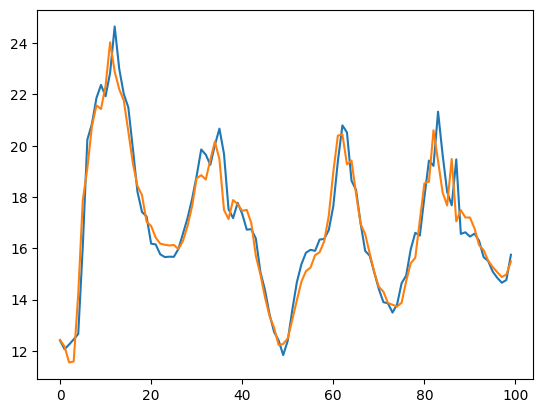

In [285]:
plot_predictions1(model4, X2_test, y2_test)

In [286]:
p_temp_df = pd.concat([df['p (mbar)'], temp_df], axis=1) # concatenate 串聯
p_temp_df

,p (mbar),Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 01:00:00,996.50,-8.05,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,996.62,-8.88,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,996.84,-8.81,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,996.99,-9.05,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,997.46,-9.63,0.965926,0.258819,0.012916,0.999917
...,...,...,...,...,...,...
2016-12-31 19:10:00,1002.18,-0.98,-0.953717,0.300706,0.006900,0.999976
2016-12-31 20:10:00,1001.40,-1.40,-0.843391,0.537300,0.007617,0.999971
2016-12-31 21:10:00,1001.19,-2.75,-0.675590,0.737277,0.008334,0.999965


In [288]:
def df_to_X_y3(df, window_size=9):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = [df_as_np[i+window_size][0], df_as_np[i+window_size][1]]
    y.append(label)
  return np.array(X), np.array(y)

In [289]:
X3, y3 = df_to_X_y3(p_temp_df)
X3.shape, y3.shape  # y3.shape的2是因為要predict pressure & temperature

((70082, 9, 6), (70082, 2))

In [290]:
X3_train, y3_train = X3[:60000], y3[:60000]
X3_val, y3_val = X3[60000:65000], y3[60000:65000]
X3_test, y3_test = X3[65000:], y3[65000:]
X3_train.shape, y3_train.shape, X3_val.shape, y3_val.shape, X3_test.shape, y3_test.shape

((60000, 9, 6), (60000, 2), (5000, 9, 6), (5000, 2), (5082, 9, 6), (5082, 2))

In [291]:
p_training_mean3 = np.mean(X3_train[:, :, 0])
p_training_std3 = np.std(X3_train[:, :, 0])

temp_training_mean3 = np.mean(X3_train[:, :, 1])
temp_training_std3 = np.std(X3_train[:, :, 1])

def preprocess3(X):
  X[:, :, 0] = (X[:, :, 0] - p_training_mean3) / p_training_std3
  X[:, :, 1] = (X[:, :, 1] - temp_training_mean3) / temp_training_std3
  return X

def preprocess_output(y):
  y[:, 0] = (y[:, 0] - p_training_mean3) / p_training_std3
  y[:, 1] = (y[:, 1] - temp_training_mean3) / temp_training_std3
  return y

In [292]:
preprocess3(X3_train)
preprocess3(X3_val)
preprocess3(X3_test)

array([[[-1.07355581e+00,  1.04008799e+00, -9.65925826e-01,
          2.58819045e-01,  5.22877889e-01, -8.52407598e-01],
        [-1.00807332e+00,  9.90720971e-01, -8.66025404e-01,
          5.00000000e-01,  5.22266764e-01, -8.52782169e-01],
        [-9.51079297e-01,  8.49672334e-01, -7.07106781e-01,
          7.07106781e-01,  5.21655371e-01, -8.53156301e-01],
        ...,
        [-8.01924728e-01,  4.74718039e-01,  2.58819045e-01,
          9.65925826e-01,  5.19207120e-01, -8.54648446e-01],
        [-7.93436257e-01,  4.12421558e-01,  5.00000000e-01,
          8.66025404e-01,  5.18594390e-01, -8.55020385e-01],
        [-7.63120287e-01,  3.53651292e-01,  7.07106781e-01,
          7.07106781e-01,  5.17981393e-01, -8.55391885e-01]],

       [[-1.00807332e+00,  9.90720971e-01, -8.66025404e-01,
          5.00000000e-01,  5.22266764e-01, -8.52782169e-01],
        [-9.51079297e-01,  8.49672334e-01, -7.07106781e-01,
          7.07106781e-01,  5.21655371e-01, -8.53156301e-01],
        [-9.14700

In [293]:
preprocess_output(y3_train)
preprocess_output(y3_val)
preprocess_output(y3_test)

array([[-0.72189057,  0.32309075],
       [-0.65277016,  0.25021562],
       [-0.65277016,  0.25491725],
       ...,
       [ 1.48147409, -1.43061397],
       [ 1.41599159, -1.44706965],
       [ 1.3505091 , -1.5693118 ]])

In [304]:
model5 = Sequential()
model5.add(InputLayer((10, 6)))
model5.add(LSTM(64))
model5.add(Dense(8, 'relu'))
model5.add(Dense(2, 'linear'))

model5.summary()

Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_19 (LSTM)                       │ (None, 64)                  │          18,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_58 (Dense)                     │ (None, 8)                   │             520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_59 (Dense)                     │ (None, 2)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,714 (73.10 KB)

 Trainable params: 18,714 (73.10 KB)

 Non-trainable params: 0 (0.00 B)

In [309]:
cp5 = ModelCheckpoint('model5/.keras', save_best_only=True)
model5.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [310]:
model5.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp5])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 0.2438 - root_mean_squared_error: 0.4865 - val_loss: 0.0149 - val_root_mean_squared_error: 0.1220
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - loss: 0.0148 - root_mean_squared_error: 0.1214 - val_loss: 0.0086 - val_root_mean_squared_error: 0.0927
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0090 - root_mean_squared_error: 0.0951 - val_loss: 0.0064 - val_root_mean_squared_error: 0.0799
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.0072 - root_mean_squared_error: 0.0850 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0707
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.0060 - root_mean_squared_error: 0.0776 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0688
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0051 - root_mean_squared_error: 0.0716 - val_loss: 0.0040 - val_root_mean_squared_error: 0.0634
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━

In [322]:
def plot_predictions2(model, X, y, start=0, end=1000): # start：繪圖的起始索引（預設為0）。end：繪圖的結束索引（預設為100）。
  predictions = model.predict(X)
  p_preds, temp_preds = predictions[:, 0], predictions[:, 1]
  p_actuals, temp_actuals = y[:, 0], y[:, 1]
  df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                          'Temperature Actuals':temp_actuals,
                          'Pressure Predictions': p_preds,
                          'Pressure Actuals': p_actuals
                          })
  plt.plot(df['Temperature Predictions'][start:end])
  plt.plot(df['Temperature Actuals'][start:end])
  plt.plot(df['Pressure Predictions'][start:end])
  plt.plot(df['Pressure Actuals'][start:end])
  return df

159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,0.304016,0.323091,-0.732601,-0.721891
1,0.304570,0.250216,-0.676505,-0.652770
2,0.252397,0.254917,-0.591174,-0.652770
3,0.316424,0.564049,-0.590128,-0.620029
4,0.737066,0.993072,-0.591034,-0.573949
...,...,...,...,...
5077,-1.254019,-1.222567,1.595340,1.601525
5078,-1.274169,-1.271934,1.580611,1.506940
5079,-1.293183,-1.430614,1.481966,1.481474
5080,-1.469454,-1.447070,1.428729,1.415992


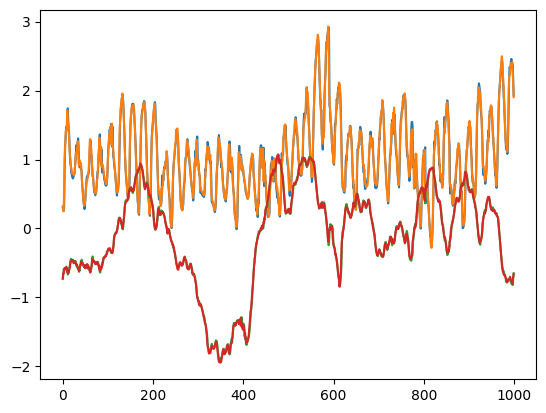

In [323]:
plot_predictions2(model5, X3_test, y3_test)

In [324]:
# arr:一個 NumPy 數組，代表模型的輸出或經過預處理後的數據。
# arr*temp_training_std3：將 arr 乘以 temp_training_std3，這一步將數據乘回原始數據的標準差，恢復到原來的波動範圍。
# + temp_training_mean3：再加上 temp_training_mean3，這會將數據的平均值平移回原來的均值。
def postprocess_temp(arr):
  arr = (arr*temp_training_std3) + temp_training_mean3
  return arr

def postprocess_p(arr):
  arr = (arr*p_training_std3) + p_training_mean3
  return arr

In [325]:
def get_predictions_postprocessed(model, X, y):
  predictions = model.predict(X)
  p_preds, temp_preds = postprocess_p(predictions[:, 0]), postprocess_temp(predictions[:, 1])
  p_actuals, temp_actuals = postprocess_p(y[:, 0]), postprocess_temp(y[:, 1])
  df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                          'Temperature Actuals':temp_actuals,
                          'Pressure Predictions': p_preds,
                          'Pressure Actuals': p_actuals
                          })
  return df

In [326]:
post_processed_df = get_predictions_postprocessed(model5, X3_test, y3_test)
post_processed_df

159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,12.007714,12.17,982.931702,983.02
1,12.012435,11.55,983.394287,983.59
2,11.568562,11.59,984.097961,983.59
3,12.113282,14.22,984.106628,983.86
4,15.691977,17.87,984.099121,984.24
...,...,...,...,...
5077,-1.247581,-0.98,1002.129028,1002.18
5078,-1.419012,-1.40,1002.007568,1001.40
5079,-1.580774,-2.75,1001.194092,1001.19
5080,-3.080442,-2.89,1000.755066,1000.65


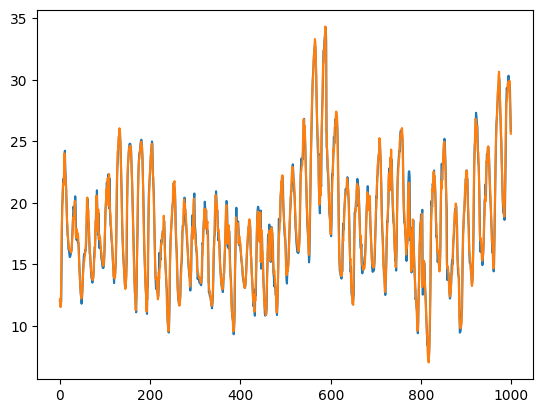

In [327]:
start, end = 0, 1000
plt.plot(post_processed_df['Temperature Predictions'][start:end])
plt.plot(post_processed_df['Temperature Actuals'][start:end])

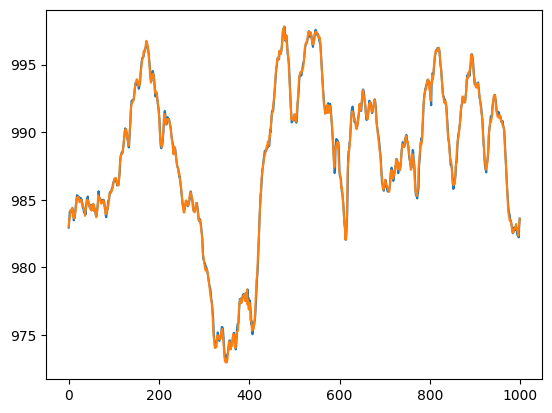

In [328]:
plt.plot(post_processed_df['Pressure Predictions'][start:end])
plt.plot(post_processed_df['Pressure Actuals'][start:end])

In [344]:
# 當 return_sequences=True 時，該層會返回完整的序列數據，這意味著每個時間步的輸出都會被返回（即輸出的形狀為 (batch_size, timesteps, 32)）。
# 如果 return_sequences=False，該層只會返回最後一個時間步的輸出，這時輸出的形狀會是 (batch_size, 32)。
model6 = Sequential()
model6.add(InputLayer((7, 6)))
model6.add(LSTM(32, return_sequences=True))
model6.add(LSTM(16))
model6.add(Dense(8, 'relu'))
model6.add(Dense(2, 'linear'))

model6.summary()

Model: "sequential_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_24 (LSTM)                       │ (None, 7, 32)               │           4,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_25 (LSTM)                       │ (None, 16)                  │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_71 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_72 (Dense)                     │ (None, 2)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,282 (32.35 KB)

 Trainable params: 8,282 (32.35 KB)

 Non-trainable params: 0 (0.00 B)

In [345]:
cp6 = ModelCheckpoint('model6/.keras', save_best_only=True)
model6.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [346]:
model6.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp6])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - loss: 0.5687 - root_mean_squared_error: 0.7377 - val_loss: 0.0625 - val_root_mean_squared_error: 0.2501
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 0.0590 - root_mean_squared_error: 0.2427 - val_loss: 0.0361 - val_root_mean_squared_error: 0.1901
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 0.0318 - root_mean_squared_error: 0.1781 - val_loss: 0.0182 - val_root_mean_squared_error: 0.1348
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 0.0166 - root_mean_squared_error: 0.1288 - val_loss: 0.0109 - val_root_mean_squared_error: 0.1043
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 0.0121 - root_mean_squared_error: 0.1099 - val_loss: 0.0084 - val_root_mean_squared_error: 0.0919
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - loss: 0.0086 - root_mean_squared_error: 0.0928 - val_loss: 0.0065 - val_root_mean_squared_error: 0.0804
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━

In [350]:
model7 = Sequential()
model7.add(InputLayer((7, 6)))
model7.add(Conv1D(64, kernel_size=2, activation='relu'))
model7.add(Flatten())
model7.add(Dense(8, 'relu'))
model7.add(Dense(2, 'linear'))
model7.summary()

cp7 = ModelCheckpoint('model6/.keras', save_best_only=True)
model7.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

Model: "sequential_42"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_12 (Conv1D)                   │ (None, 6, 64)               │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_13 (Flatten)                 │ (None, 384)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_77 (Dense)                     │ (None, 8)                   │           3,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_78 (Dense)                     │ (None, 2)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,930 (15.35 KB)

 Trainable params: 3,930 (15.35 KB)

 Non-trainable params: 0 (0.00 B)

In [351]:
model7.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp7])

Epoch 1/10


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_77" is incompatible with the layer: expected axis -1 of input shape to have value 384, but received input with shape (32, 512)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 9, 6), dtype=float32)
  • training=True
  • mask=None